In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configurações para suprimir warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.max_open_warning': 0})
sns.set_style('whitegrid')


In [22]:
# Carregando o dataset
df = pd.read_csv('merch_sales.csv')

# Convertendo colunas de data
date_columns = df.select_dtypes(include=['object']).apply(
    lambda x: pd.to_datetime(x, errors='ignore')).select_dtypes(include=['datetime64[ns]']).columns

if len(date_columns) > 0:
    for col in date_columns:
        df[col] = pd.to_datetime(df[col])

# Informações básicas do dataset
print("\n=== Informações básicas do dataset ===")
print(df.info())


=== Informações básicas do dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                7394 non-null   int64         
 1   Order Date              7394 non-null   datetime64[ns]
 2   Product ID              7394 non-null   object        
 3   Product Category        7394 non-null   object        
 4   Buyer Gender            7394 non-null   object        
 5   Buyer Age               7394 non-null   int64         
 6   Order Location          7394 non-null   object        
 7   International Shipping  7394 non-null   object        
 8   Sales Price             7394 non-null   int64         
 9   Shipping Charges        7394 non-null   int64         
 10  Sales per Unit          7394 non-null   int64         
 11  Quantity                7394 non-null   int64         
 12  Total Sa

In [4]:
# Visualizando as primeiras linhas
print("\n=== Primeiras 5 linhas do dataset ===")
df.head()


=== Primeiras 5 linhas do dataset ===


,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


In [15]:
# Estatísticas descritivas (apenas para colunas numéricas)
print("\n=== Estatísticas descritivas ===")
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].describe()


=== Estatísticas descritivas ===


,Order ID,Buyer Age,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating
count,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000
mean,159735.134028,26.455504,55.165404,14.633487,69.798891,1.668109,115.832026,3.499053
std,23040.247194,5.208202,39.575614,24.815719,46.702326,1.081398,118.067960,1.389731
min,120005.000000,18.000000,9.000000,0.000000,9.000000,1.000000,9.000000,1.000000
25%,139895.750000,22.000000,15.000000,0.000000,20.000000,1.000000,40.000000,3.000000
50%,159577.500000,26.000000,65.000000,0.000000,65.000000,1.000000,90.000000,4.000000
75%,179869.750000,31.000000,97.000000,40.000000,100.000000,2.000000,137.000000,5.000000
max,199994.000000,35.000000,130.000000,100.000000,230.000000,5.000000,1000.000000,5.000000


In [7]:
# Verificando valores nulos
print("\n=== Valores nulos por coluna ===")
print(df.isnull().sum())



=== Valores nulos por coluna ===
Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64


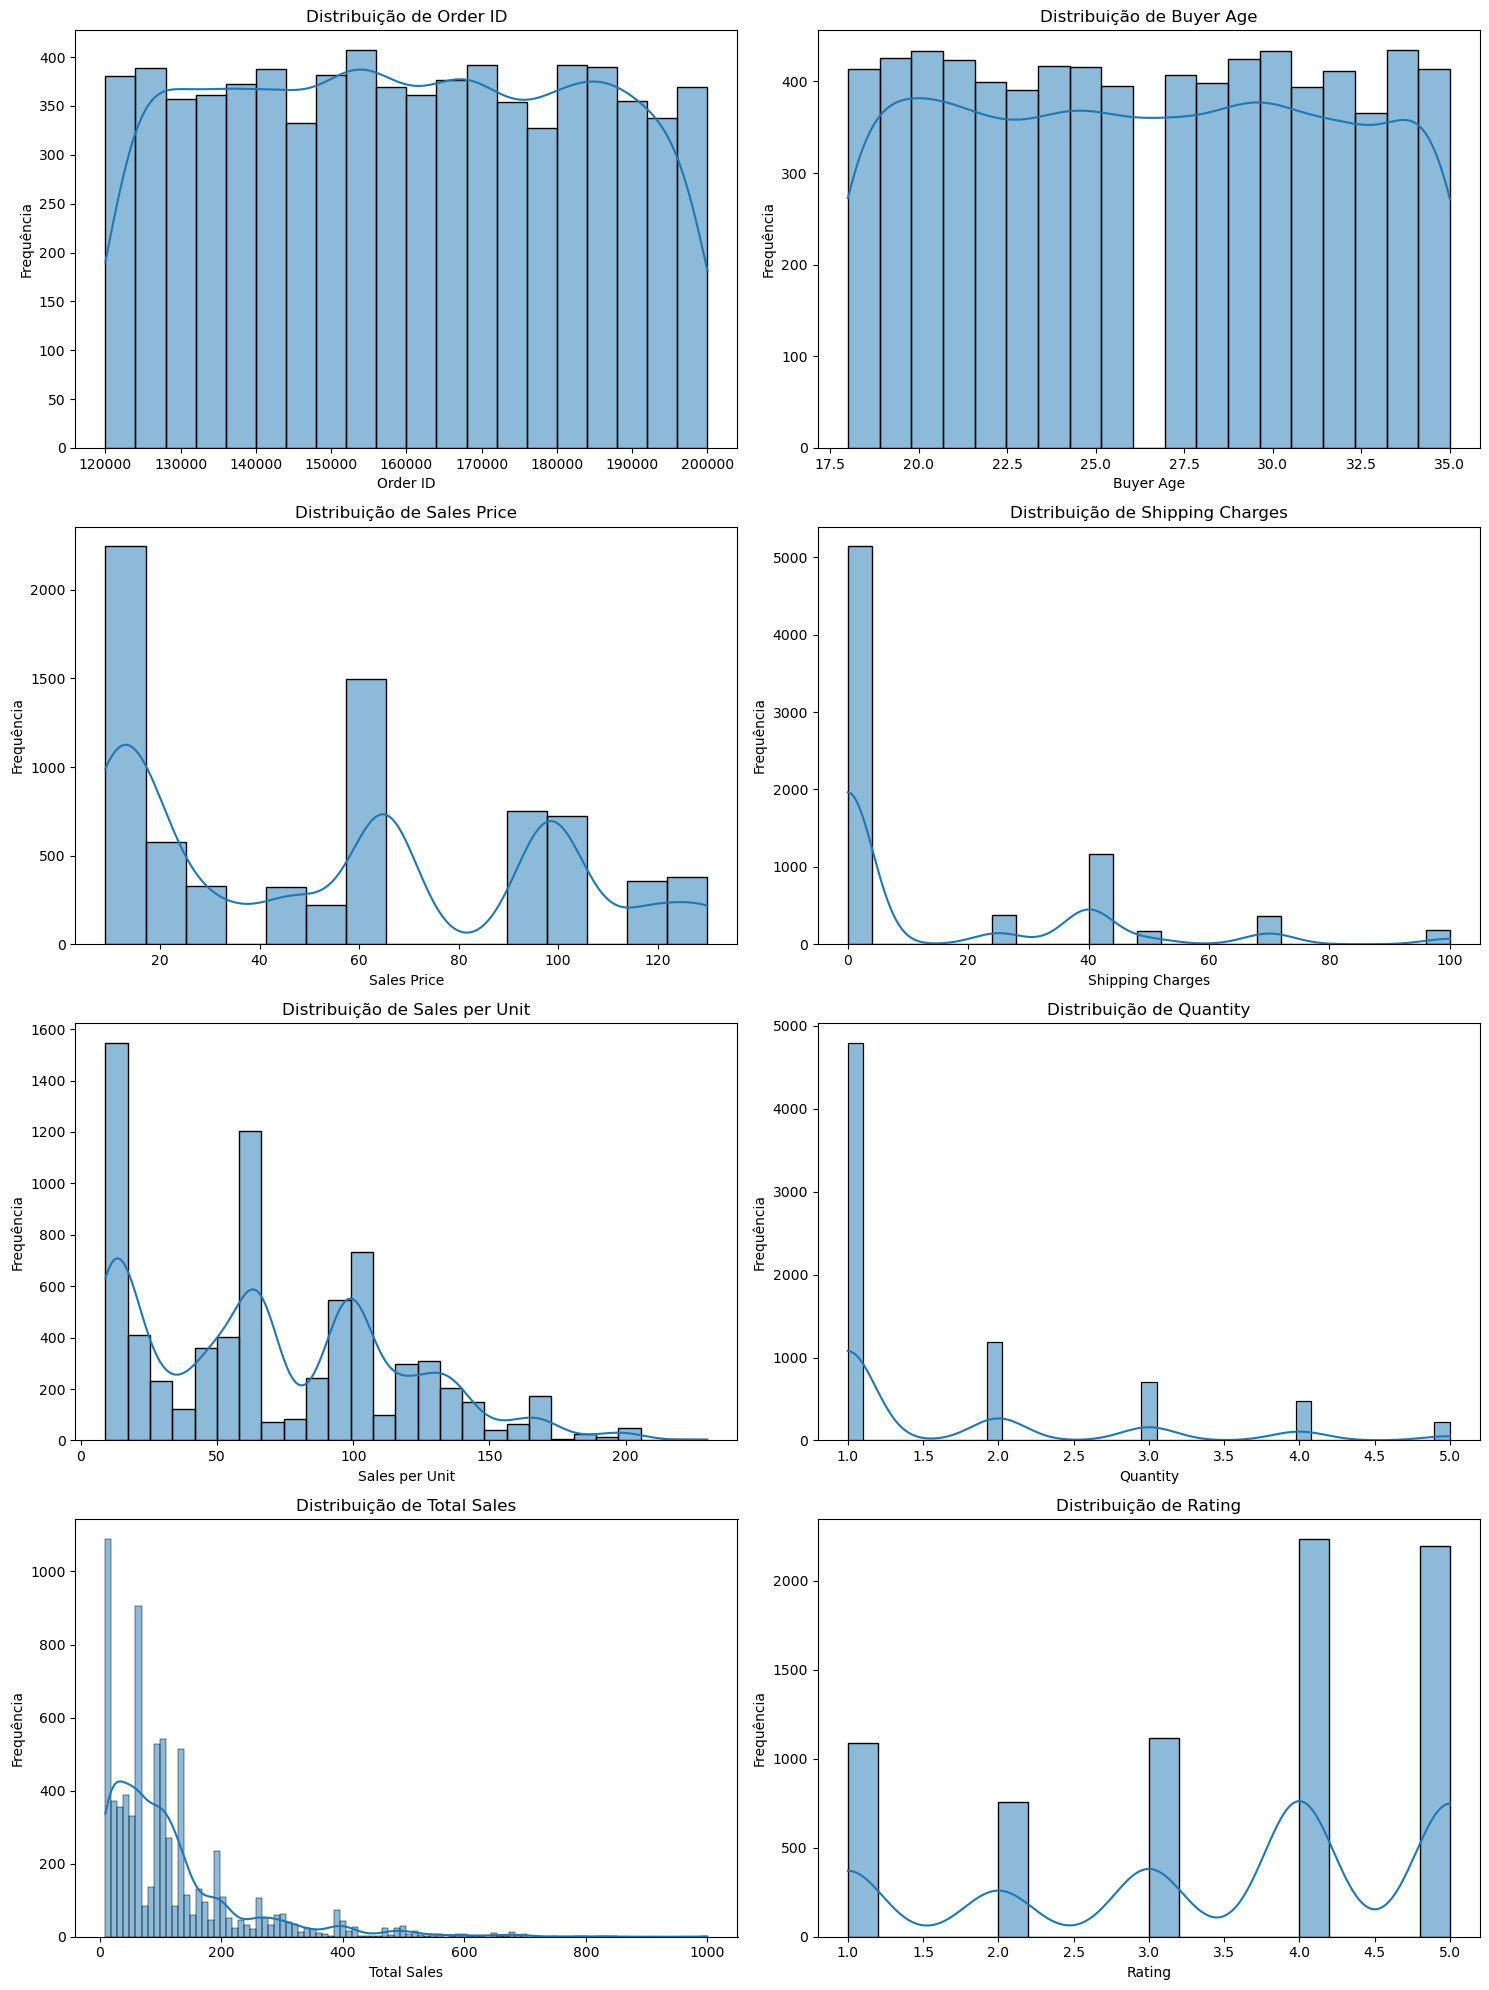

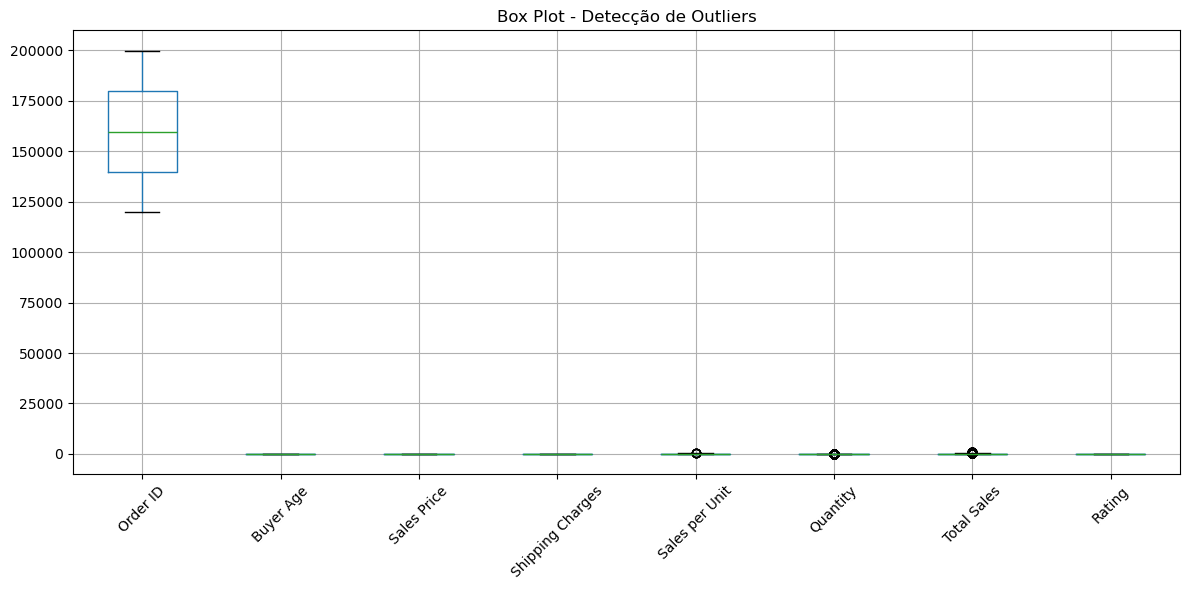

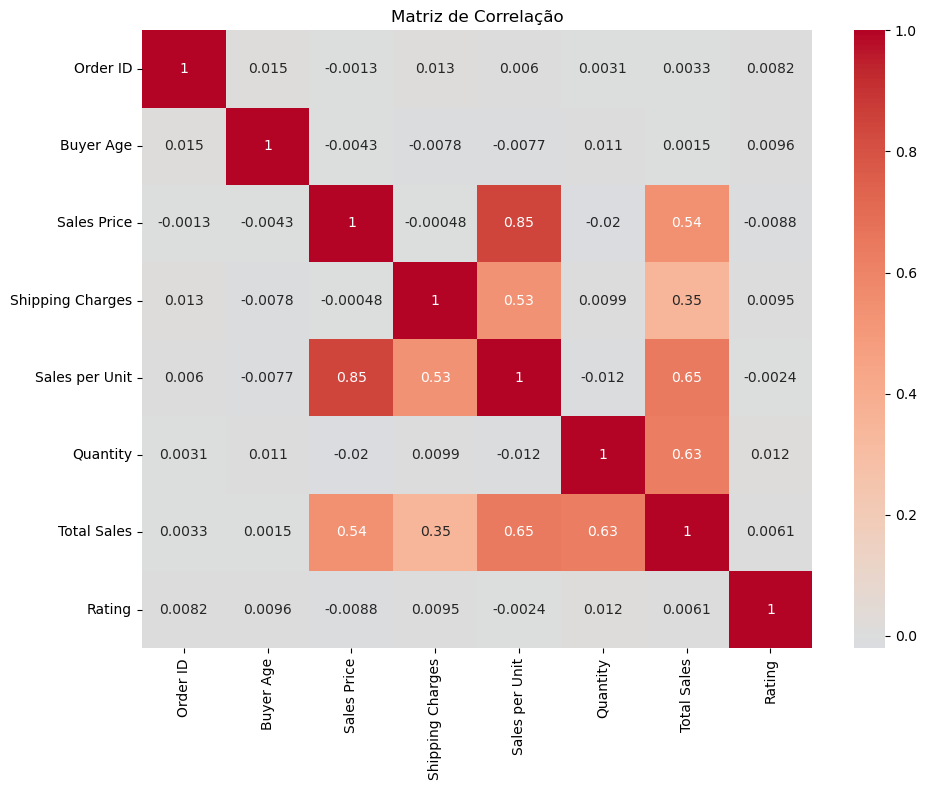

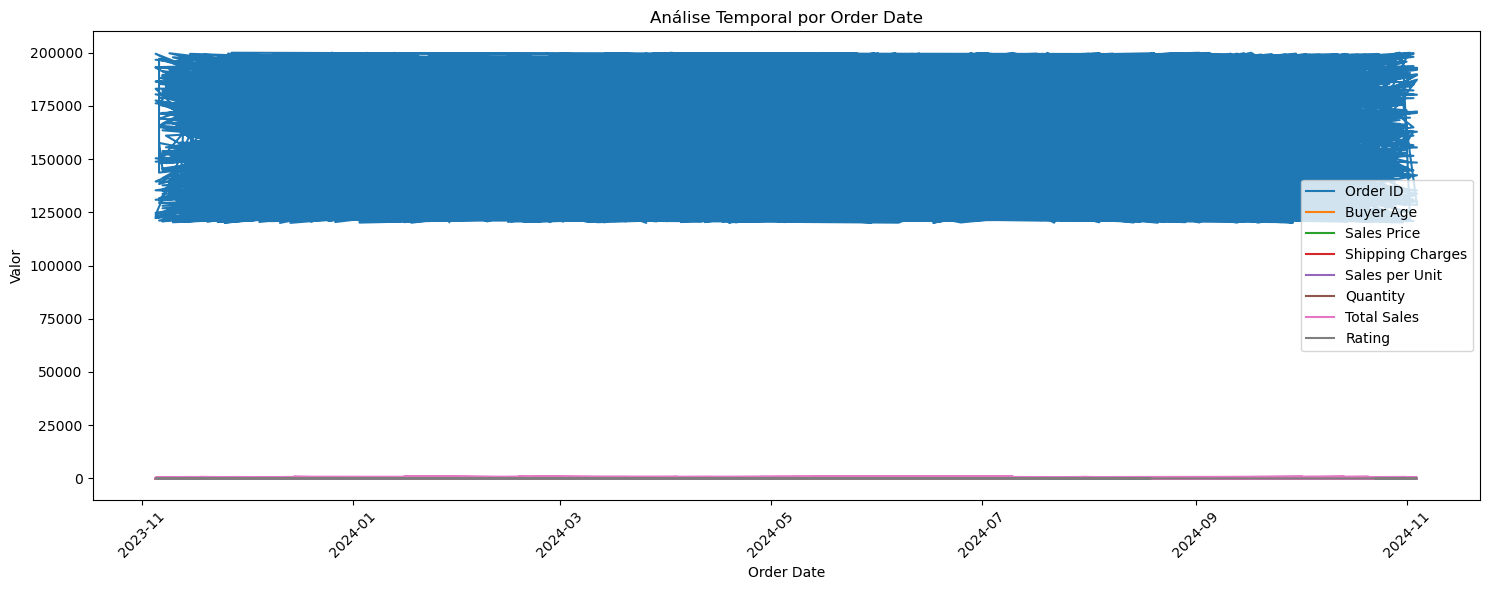

In [19]:
# Configurando o estilo dos gráficos
plt.style.use('default')

# 1. Distribuição das variáveis numéricas
num_vars = len(numeric_columns)
if num_vars > 0:
    num_rows = (num_vars + 1) // 2  # Arredonda para cima
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, coluna in enumerate(numeric_columns):
        plt.subplot(num_rows, 2, i+1)
        sns.histplot(df[coluna], kde=True)
        plt.title(f'Distribuição de {coluna}')
        plt.xlabel(coluna)
        plt.ylabel('Frequência')
    
    plt.tight_layout()
    plt.savefig('distribuicao_variaveis.png')
    plt.show()

# 2. Box plot para detectar outliers (apenas variáveis numéricas)
plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot()
plt.title('Box Plot - Detecção de Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplot_outliers.png')
plt.show()

# 3. Matriz de correlação (apenas variáveis numéricas)
if len(numeric_columns) > 1:  # Só criar matriz de correlação se houver mais de uma variável numérica
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numeric_columns].corr()  # Usando apenas colunas numéricas
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlação')
    plt.tight_layout()
    plt.savefig('matriz_correlacao.png')
    plt.show()

# 4. Análise temporal (se houver colunas de data)
if len(date_columns) > 0:
    for date_col in date_columns:
        plt.figure(figsize=(15, 6))
        for num_col in numeric_columns:
            plt.plot(df[date_col], df[num_col], label=num_col)
        plt.title(f'Análise Temporal por {date_col}')
        plt.xlabel(date_col)
        plt.ylabel('Valor')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'analise_temporal_{date_col}.png')
        plt.show()

In [12]:
# Análise de valores únicos para variáveis categóricas
print("\n=== Análise de valores únicos para variáveis categóricas ===")
for coluna in df.select_dtypes(include=['object']).columns:
    print(f"\nValores únicos em {coluna}:")
    print(df[coluna].value_counts()) 


=== Análise de valores únicos para variáveis categóricas ===

Valores únicos em Product ID:
Product ID
BF1548    1497
BF1551     944
BF1550     750
BF1544     732
BF1543     721
BF1545     569
BF1554     442
BF1549     378
BF1546     358
BF1547     326
BF1552     323
BF1553     221
BF1555     133
Name: count, dtype: int64

Valores únicos em Product Category:
Product Category
Clothing     3704
Ornaments    2256
Other        1434
Name: count, dtype: int64

Valores únicos em Buyer Gender:
Buyer Gender
Male      5188
Female    2206
Name: count, dtype: int64

Valores únicos em Order Location:
Order Location
New Jersey       434
Portland         420
San Francisco    414
Sacramento       412
San Antonio      408
Memphis          402
Cleveland        390
Las Vegas        385
New York         381
Detroit          378
Pittsburgh       375
Austin           374
Miami            366
Manchester       208
Cardiff          205
Dublin           196
London           191
Liverpool        189
Montreal   